In [1]:
import pandas as pd
import datetime
import numpy as np
import sklearn
from sklearn.cross_validation import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import *
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
d1=pd.read_csv("C:/Users/nitin/Downloads/Dataset/Dataset/Training/Features_Variant_1.csv")
d2=pd.read_csv("C:/Users/nitin/Downloads/Dataset/Dataset/Training/Features_Variant_2.csv")
d3=pd.read_csv("C:/Users/nitin/Downloads/Dataset/Dataset/Training/Features_Variant_3.csv")
d4=pd.read_csv("C:/Users/nitin/Downloads/Dataset/Dataset/Training/Features_Variant_4.csv")
d5=pd.read_csv("C:/Users/nitin/Downloads/Dataset/Dataset/Training/Features_Variant_5.csv")

In [3]:
frames = [d1 , d2 , d3 , d4 , d5]

In [4]:
df_train = pd.concat(frames)

In [5]:
df_train.shape

(602813, 54)

In [48]:
df_train.head()

,Page_popularity,Page_visited_no_of_times,Page_talking_about,Page_category,c1,c2,c3,c4,c5,c6,...,Friday_post,Saturday_post,Sunday_base,Monday_base,Tuesday_base,Wednesday_base,Thrusday_base,Friday_base,Saturday_base,Target_variable
0,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
df_train.isnull().sum()

Page_popularity             0
Page_visited_no_of_times    0
Page_talking_about          0
Page_category               0
c1                          0
c2                          0
c3                          0
c4                          0
c5                          0
c6                          0
c7                          0
c8                          0
c9                          0
c10                         0
c11                         0
c12                         0
c13                         0
c14                         0
c15                         0
c16                         0
c17                         0
c18                         0
c19                         0
c20                         0
c21                         0
c22                         0
c23                         0
c24                         0
c25                         0
CC1                         0
CC2                         0
CC3                         0
CC4                         0
CC5       

In [50]:
df_train.dtypes

Page_popularity               int64
Page_visited_no_of_times      int64
Page_talking_about            int64
Page_category                 int64
c1                            int64
c2                            int64
c3                          float64
c4                          float64
c5                          float64
c6                            int64
c7                            int64
c8                          float64
c9                          float64
c10                         float64
c11                           int64
c12                           int64
c13                         float64
c14                         float64
c15                         float64
c16                           int64
c17                           int64
c18                         float64
c19                         float64
c20                         float64
c21                           int64
c22                           int64
c23                         float64
c24                         

In [6]:
t1  =pd.read_csv("C:/Users/nitin/Downloads/Dataset/Dataset/Testing/TestSet/Test_Case_1.csv")
t2  =pd.read_csv("C:/Users/nitin/Downloads/Dataset/Dataset/Testing/TestSet/Test_Case_2.csv")
t3  =pd.read_csv("C:/Users/nitin/Downloads/Dataset/Dataset/Testing/TestSet/Test_Case_3.csv")
t4  =pd.read_csv("C:/Users/nitin/Downloads/Dataset/Dataset/Testing/TestSet/Test_Case_4.csv")
t5  =pd.read_csv("C:/Users/nitin/Downloads/Dataset/Dataset/Testing/TestSet/Test_Case_5.csv")
t6  =pd.read_csv("C:/Users/nitin/Downloads/Dataset/Dataset/Testing/TestSet/Test_Case_6.csv")
t7  =pd.read_csv("C:/Users/nitin/Downloads/Dataset/Dataset/Testing/TestSet/Test_Case_7.csv")
t8  =pd.read_csv("C:/Users/nitin/Downloads/Dataset/Dataset/Testing/TestSet/Test_Case_8.csv")
t9  =pd.read_csv("C:/Users/nitin/Downloads/Dataset/Dataset/Testing/TestSet/Test_Case_9.csv")
t10 =pd.read_csv("C:/Users/nitin/Downloads/Dataset/Dataset/Testing/TestSet/Test_Case_10.csv")

In [7]:
frames_2 = [t1 , t2 , t3 , t4 , t5 , t6 , t7 , t8 , t9 , t10]

In [8]:
df_test = pd.concat(frames_2)

In [54]:
df_test.shape

(1000, 54)

In [55]:
t1.shape

(100, 54)

In [56]:
t2.shape

(100, 54)

In [57]:
df_test.head()

,Page_popularity,Page_visited_no_of_times,Page_talking_about,Page_category,c1,c2,c3,c4,c5,c6,...,Friday_post,Saturday_post,Sunday_base,Monday_base,Tuesday_base,Wednesday_base,Thrusday_base,Friday_base,Saturday_base,Target_variable
0,1340759,33935,49392,9,0,768,77.200000,36.5,132.861432,0,...,0,0,0,0,0,0,1,0,0,35
1,161455,0,5978,4,3,75,22.714286,15.0,23.389340,3,...,1,0,0,0,0,0,0,0,1,2
2,92385,88,34785,70,0,0,0.000000,0.0,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
3,395272,0,3406,17,0,22,4.000000,1.0,6.599663,0,...,0,1,1,0,0,0,0,0,0,0
4,4349418,0,614043,9,0,958,65.974194,24.0,126.960748,0,...,0,1,1,0,0,0,0,0,0,0


In [58]:
df_test.isnull().sum()

Page_popularity             0
Page_visited_no_of_times    0
Page_talking_about          0
Page_category               0
c1                          0
c2                          0
c3                          0
c4                          0
c5                          0
c6                          0
c7                          0
c8                          0
c9                          0
c10                         0
c11                         0
c12                         0
c13                         0
c14                         0
c15                         0
c16                         0
c17                         0
c18                         0
c19                         0
c20                         0
c21                         0
c22                         0
c23                         0
c24                         0
c25                         0
CC1                         0
CC2                         0
CC3                         0
CC4                         0
CC5       

In [59]:
df_test.dtypes

Page_popularity               int64
Page_visited_no_of_times      int64
Page_talking_about            int64
Page_category                 int64
c1                            int64
c2                            int64
c3                          float64
c4                          float64
c5                          float64
c6                            int64
c7                            int64
c8                          float64
c9                          float64
c10                         float64
c11                           int64
c12                           int64
c13                         float64
c14                         float64
c15                         float64
c16                           int64
c17                           int64
c18                         float64
c19                         float64
c20                         float64
c21                           int64
c22                           int64
c23                         float64
c24                         

In [11]:
x_train=df_train.iloc[:,1:]
y_train=df_train['Page_popularity']
scaler.fit(x_train)
x_train_sc=scaler.transform(x_train)
x_test=df_test.iloc[:,1:]
y_test=df_test['Page_popularity']
x_test_sc=scaler.transform(x_test)

In [61]:
lm=linear_model.LinearRegression()
mod=lm.fit(x_train_sc,y_train)
print(mod.coef_)
print(x_train.columns)

[ -3.29377565e+05   5.26135333e+06  -1.65384713e+04  -4.15899089e+06
  -1.14584999e+06   2.61035529e+07  -1.37753284e+06  -7.29840255e+06
   4.35523161e+05   1.77385990e+06  -2.52070796e+14  -3.74045613e+05
   3.20488469e+06  -1.54691602e+04  -2.07215252e+06   2.19879858e+14
   3.09557241e+05   1.13348545e+06   3.97516884e+06   1.84878829e+06
  -2.25064530e+07   1.76135702e+06   4.84348350e+06  -1.73615033e+06
  -2.77711273e+06   8.42162615e+13   1.41556368e+05  -1.26699599e+06
  -8.13112240e+04  -2.29413016e+18   2.22961846e+18   2.76993482e+04
   2.87463330e+18   4.18915792e+04   2.73228264e+04   1.92916668e+05
   5.02343637e+16   2.38228209e+05  -1.66234331e+17  -1.77713534e+17
  -1.80953195e+17  -1.84683698e+17  -1.78205714e+17  -1.79233492e+17
  -1.74384630e+17   2.39493755e+17   2.34986888e+17   2.37821461e+17
   2.44154031e+17   2.49590601e+17   2.42738564e+17   2.41048879e+17
  -3.00146969e+03]
Index(['Page_visited_no_of_times', 'Page_talking_about', 'Page_category', 'c1',
    

In [62]:
rf=RandomForestRegressor()
rf.fit(x_train_sc, y_train)
feature_list = list(x_train.columns)
importances = list(rf.feature_importances_)
feature_importances = [(x_train, round(importance, 2)) for x_train, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Page_talking_about   Importance: 0.78
Variable: Page_category        Importance: 0.03
Variable: c17                  Importance: 0.03
Variable: c18                  Importance: 0.03
Variable: Page_visited_no_of_times Importance: 0.02
Variable: Post_length_char_count Importance: 0.02
Variable: Post_share_count     Importance: 0.02
Variable: Sunday_post          Importance: 0.02
Variable: c5                   Importance: 0.01
Variable: c8                   Importance: 0.01
Variable: c25                  Importance: 0.01
Variable: c1                   Importance: 0.0
Variable: c2                   Importance: 0.0
Variable: c3                   Importance: 0.0
Variable: c4                   Importance: 0.0
Variable: c6                   Importance: 0.0
Variable: c7                   Importance: 0.0
Variable: c9                   Importance: 0.0
Variable: c10                  Importance: 0.0
Variable: c11                  Importance: 0.0
Variable: c12                  Importance: 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

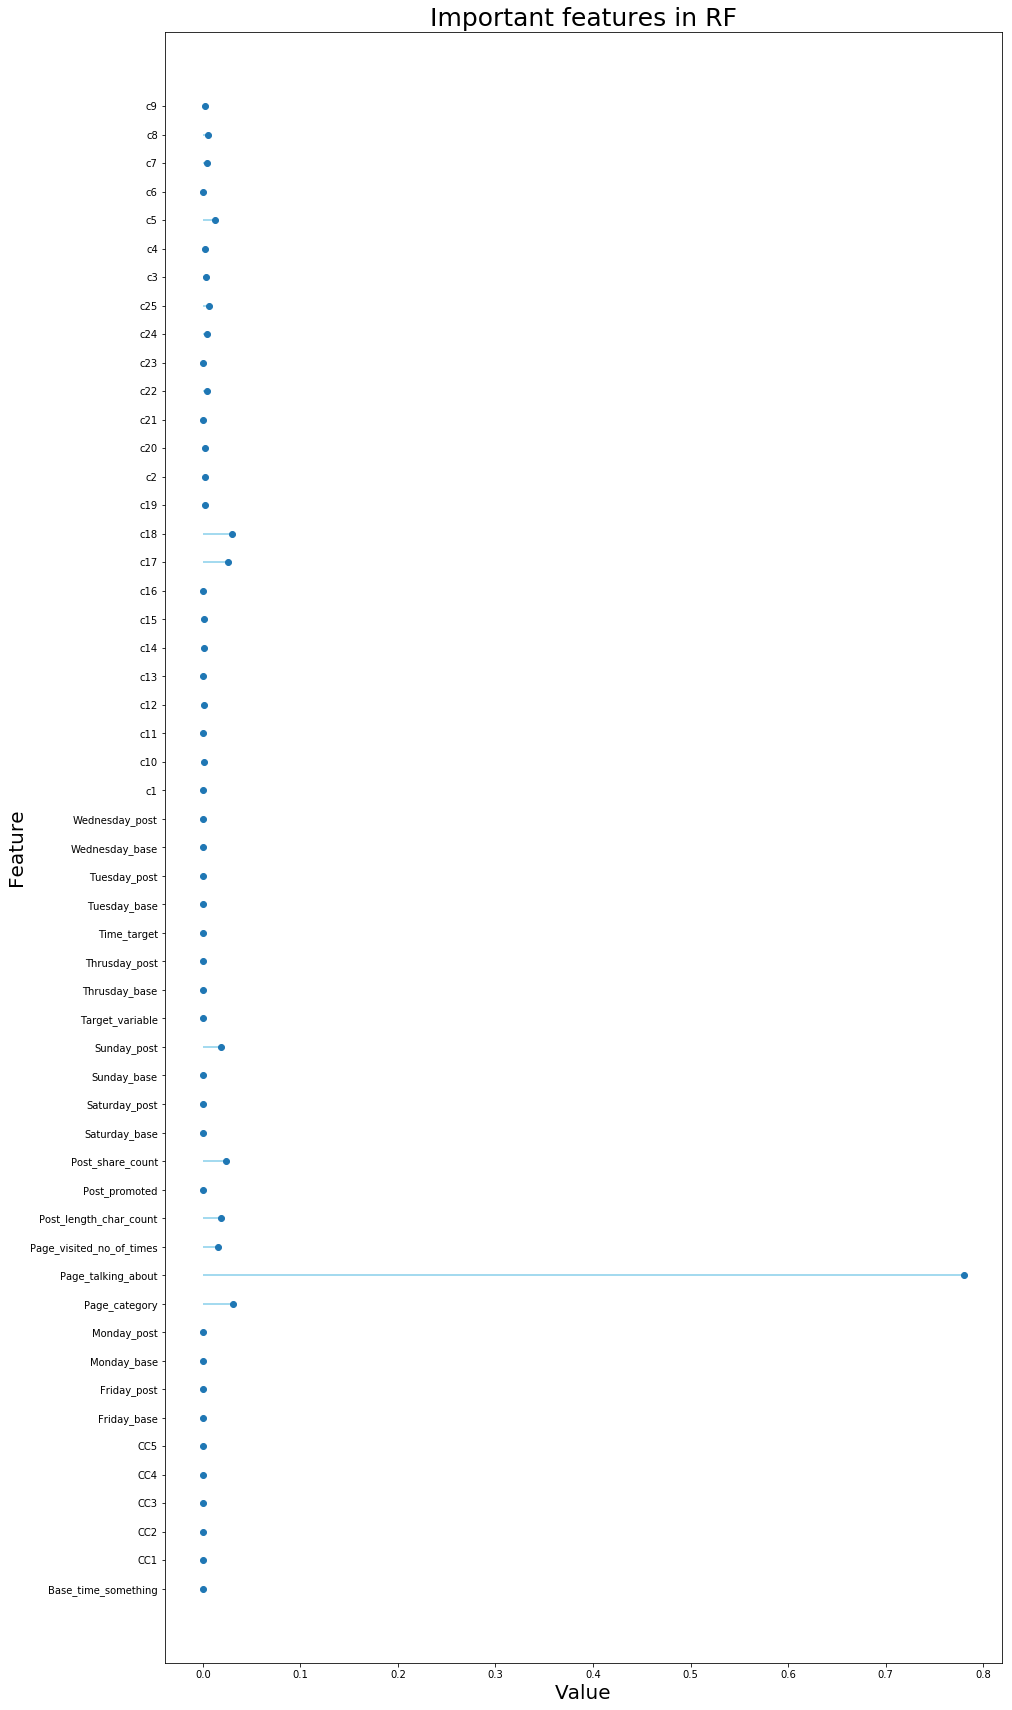

In [73]:
plt.xlabel("Value" , fontsize=20)
plt.ylabel("Feature" , fontsize=20)
plt.legend()
plt.title("Important features in RF" , fontsize=25)
plt.hlines(y=feature_list, xmin=0, xmax=importances, color='skyblue')
plt.plot(importances, feature_list , "o")
plt.rcParams['figure.figsize'] = (15 , 35)
plt.show()

In [74]:
from sklearn import linear_model
rf=linear_model.LinearRegression()
rf.fit(x_train_sc, y_train)
feature_list = list(x_train.columns)
#importances = list(rf.feature_importances_)
feature_importances = [(x_train, round(importance, 2)) for x_train, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Page_talking_about   Importance: 0.78
Variable: Page_category        Importance: 0.03
Variable: c17                  Importance: 0.03
Variable: c18                  Importance: 0.03
Variable: Page_visited_no_of_times Importance: 0.02
Variable: Post_length_char_count Importance: 0.02
Variable: Post_share_count     Importance: 0.02
Variable: Sunday_post          Importance: 0.02
Variable: c5                   Importance: 0.01
Variable: c8                   Importance: 0.01
Variable: c25                  Importance: 0.01
Variable: c1                   Importance: 0.0
Variable: c2                   Importance: 0.0
Variable: c3                   Importance: 0.0
Variable: c4                   Importance: 0.0
Variable: c6                   Importance: 0.0
Variable: c7                   Importance: 0.0
Variable: c9                   Importance: 0.0
Variable: c10                  Importance: 0.0
Variable: c11                  Importance: 0.0
Variable: c12                  Importance: 

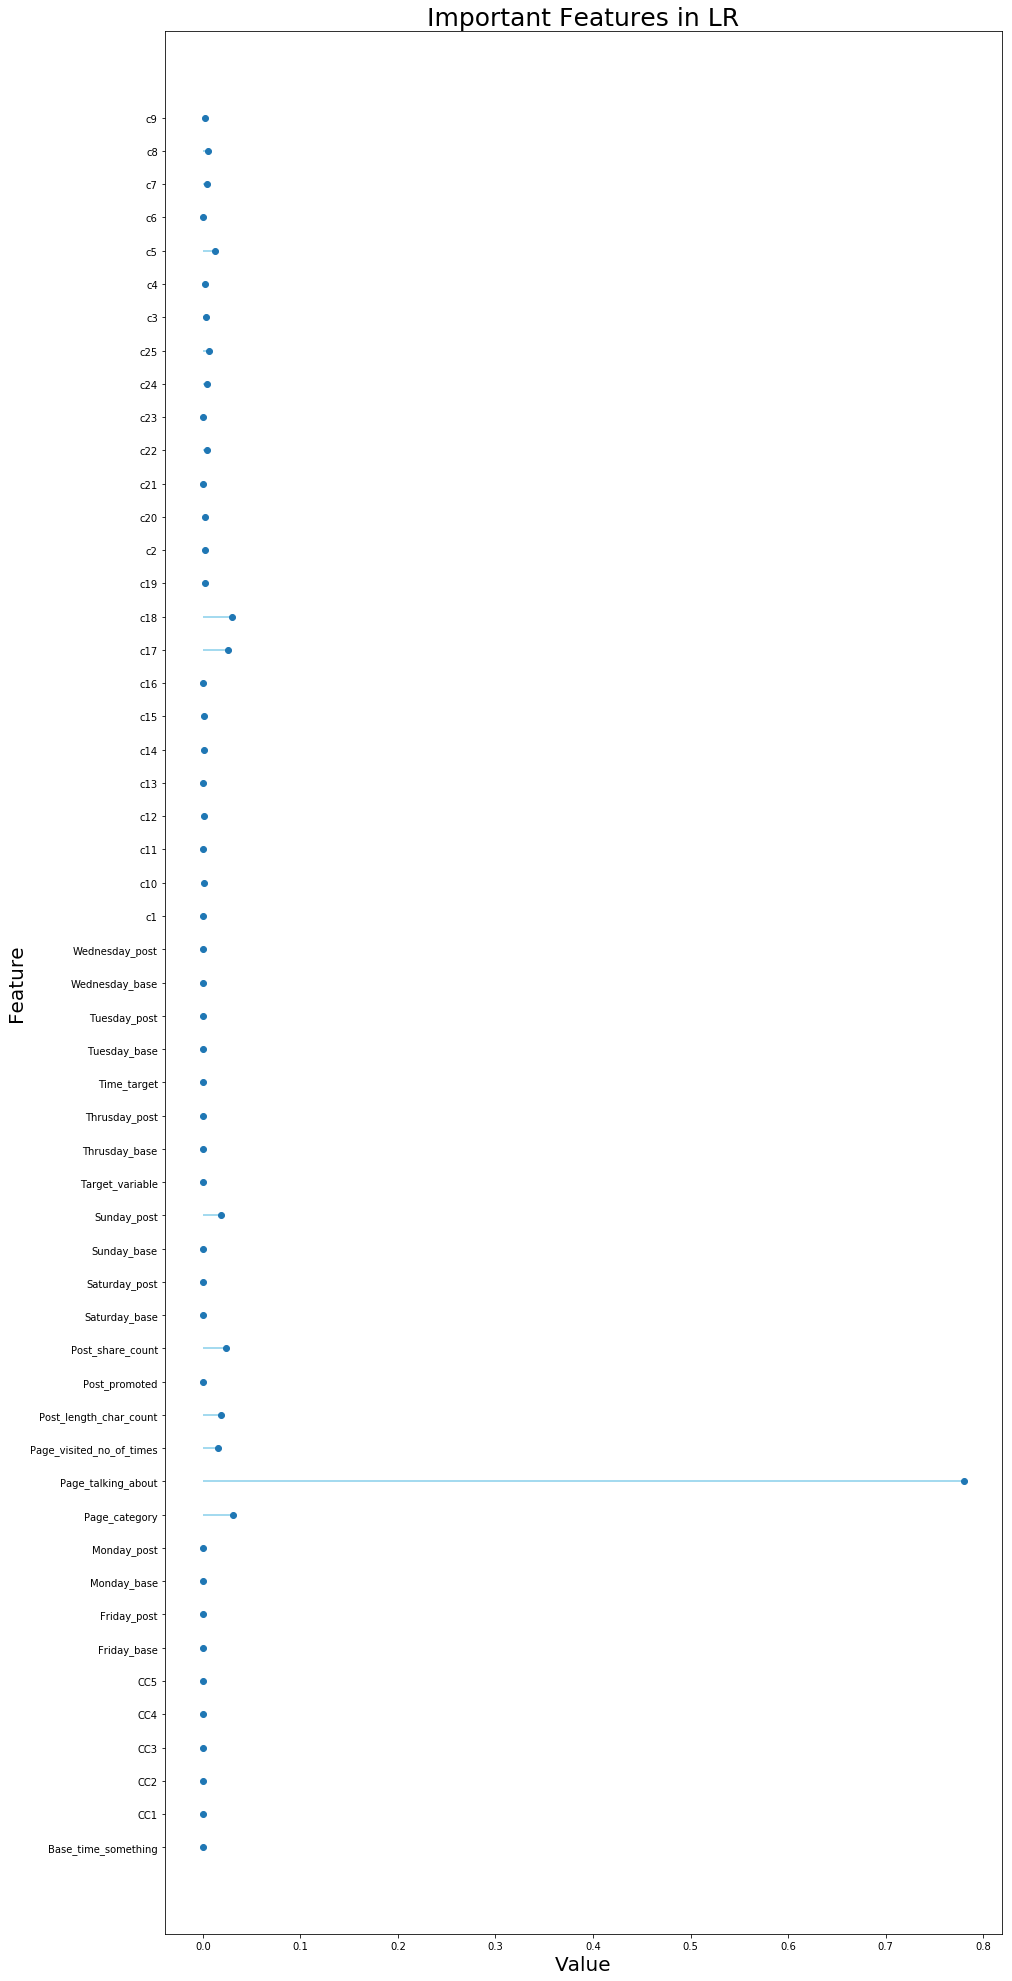

In [75]:
plt.xlabel("Value" , fontsize=20)
plt.ylabel("Feature" , fontsize=20)
plt.legend()
plt.title("Important Features in LR" , fontsize=25)
plt.hlines(y=feature_list, xmin=0, xmax=importances, color='skyblue')
plt.plot(importances, feature_list , "o")
plt.rcParams['figure.figsize'] = (15 , 30)
plt.show()

In [76]:
from sklearn import tree
rf=tree.DecisionTreeClassifier()
rf.fit(x_train_sc, y_train)
feature_list = list(x_train.columns)
#importances = list(rf.feature_importances_)
feature_importances = [(x_train, round(importance, 2)) for x_train, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Page_talking_about   Importance: 0.78
Variable: Page_category        Importance: 0.03
Variable: c17                  Importance: 0.03
Variable: c18                  Importance: 0.03
Variable: Page_visited_no_of_times Importance: 0.02
Variable: Post_length_char_count Importance: 0.02
Variable: Post_share_count     Importance: 0.02
Variable: Sunday_post          Importance: 0.02
Variable: c5                   Importance: 0.01
Variable: c8                   Importance: 0.01
Variable: c25                  Importance: 0.01
Variable: c1                   Importance: 0.0
Variable: c2                   Importance: 0.0
Variable: c3                   Importance: 0.0
Variable: c4                   Importance: 0.0
Variable: c6                   Importance: 0.0
Variable: c7                   Importance: 0.0
Variable: c9                   Importance: 0.0
Variable: c10                  Importance: 0.0
Variable: c11                  Importance: 0.0
Variable: c12                  Importance: 

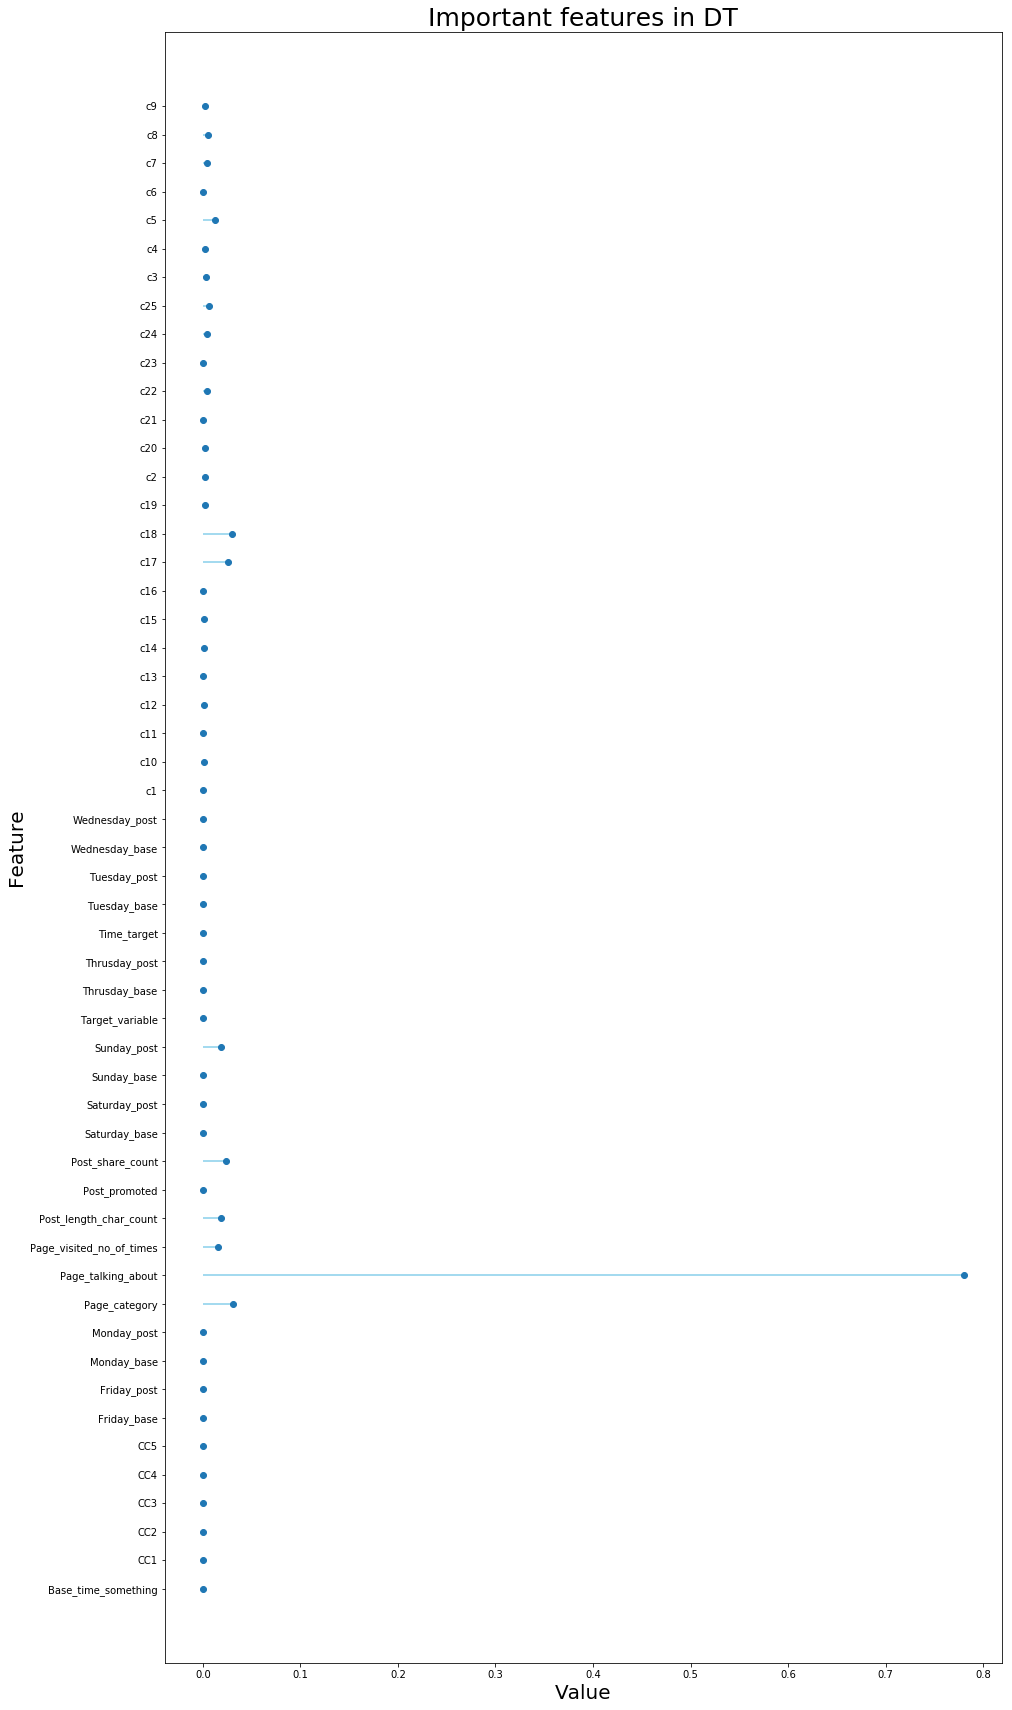

In [77]:
plt.xlabel("Value" , fontsize=20)
plt.ylabel("Feature" , fontsize=20)
plt.legend()
plt.title("Important features in DT" , fontsize=25)
plt.hlines(y=feature_list, xmin=0, xmax=importances, color='skyblue')
plt.plot(importances, feature_list , "o")
plt.rcParams['figure.figsize'] = (15 , 30)
plt.show()

In [41]:
from sklearn.naive_bayes import GaussianNB
rf= GaussianNB()
rf.fit(x_train_sc, y_train)
feature_list = list(x_train.columns)
#importances = list(rf.feature_importances_)
feature_importances = [(x_train, round(importance, 2)) for x_train, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Page_talking_about   Importance: 0.77
Variable: Page_category        Importance: 0.04
Variable: Sunday_post          Importance: 0.04
Variable: c18                  Importance: 0.03
Variable: Page_visited_no_of_times Importance: 0.02
Variable: c17                  Importance: 0.02
Variable: c5                   Importance: 0.01
Variable: c7                   Importance: 0.01
Variable: c24                  Importance: 0.01
Variable: c25                  Importance: 0.01
Variable: Post_length_char_count Importance: 0.01
Variable: Post_share_count     Importance: 0.01
Variable: c1                   Importance: 0.0
Variable: c2                   Importance: 0.0
Variable: c3                   Importance: 0.0
Variable: c4                   Importance: 0.0
Variable: c6                   Importance: 0.0
Variable: c8                   Importance: 0.0
Variable: c9                   Importance: 0.0
Variable: c10                  Importance: 0.0
Variable: c11                  Importance:

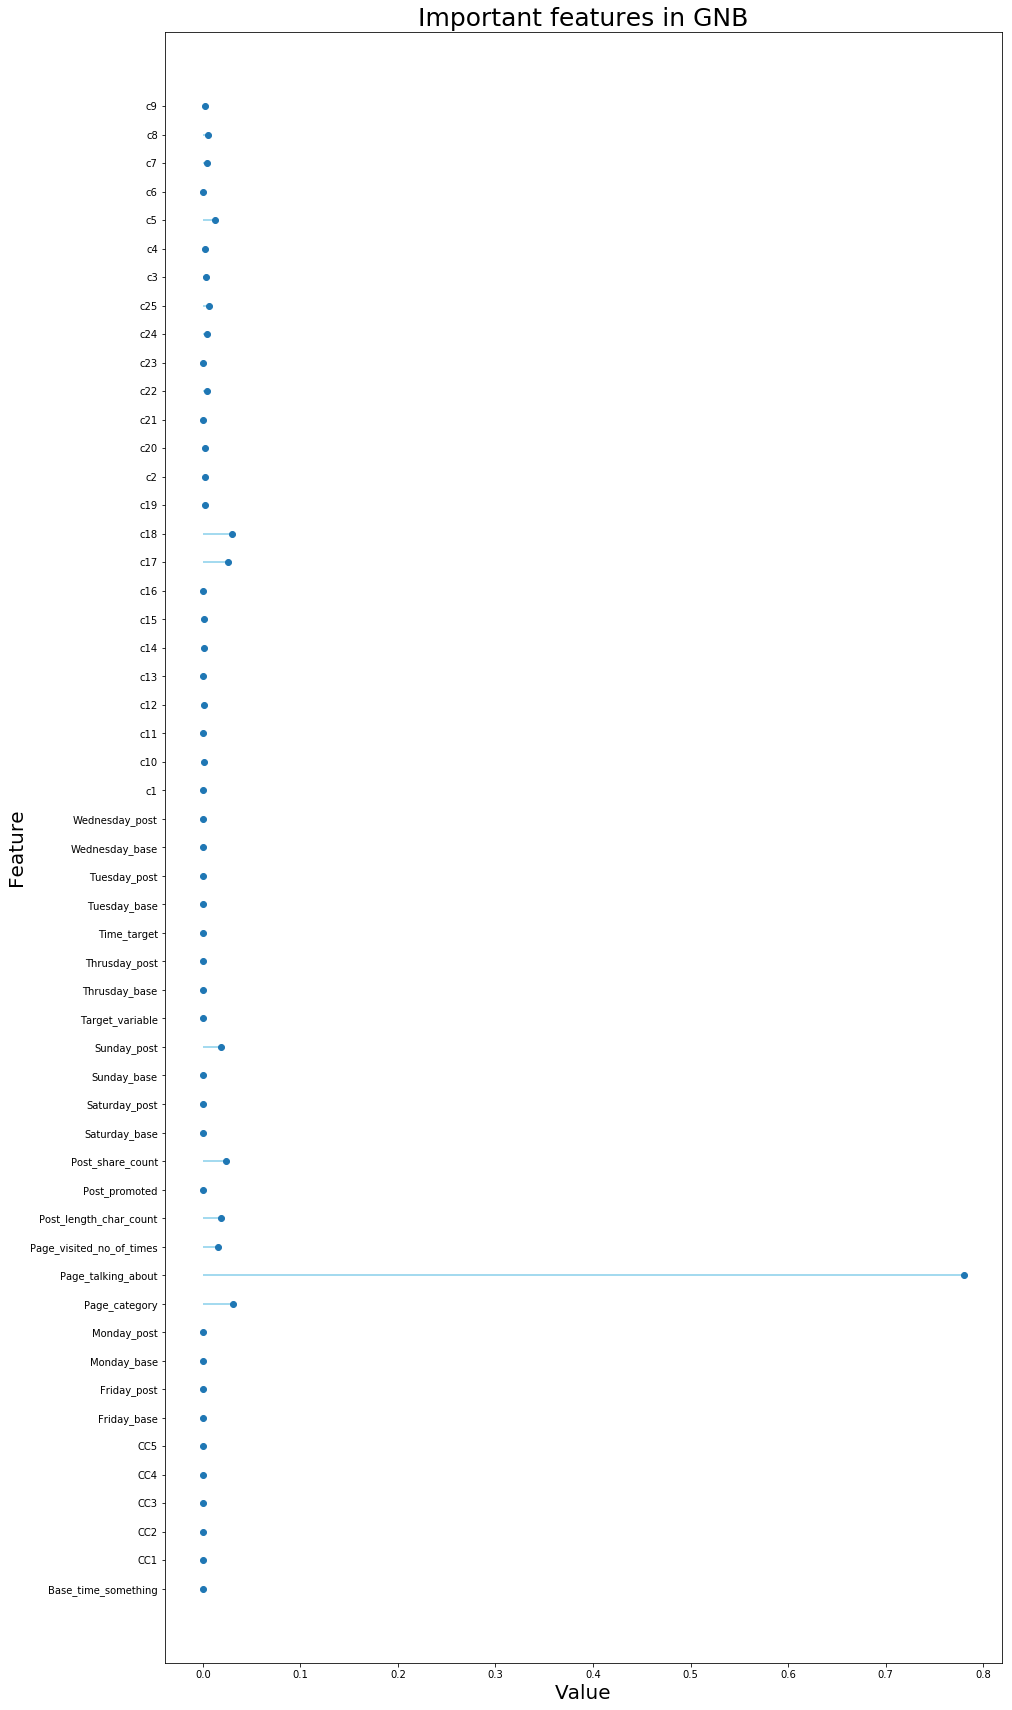

In [78]:
plt.xlabel("Value" , fontsize=20)
plt.ylabel("Feature" , fontsize=20)
plt.legend()
plt.title("Important features in GNB" , fontsize=25)
plt.hlines(y=feature_list, xmin=0, xmax=importances, color='skyblue')
plt.plot(importances, feature_list , "o")
plt.rcParams['figure.figsize'] = (15 , 30)
plt.show()